# 3 Time Series Regression

### Multiple Regression
$$g_i = \beta_0 +\beta_1 x_{i_1} +\dotsc + \beta_p x_{i_p} + \epsilon_i$$
Or, 
$$y = \beta^T x + \epsilon$$

Multivariate regression is predicting a matrix of $y$ with same vector $x$, which is in the form:
$$Y = \Beta x + \Epsilon$$

### Time Domain

$$x_t \sim x_{t-1},\dotsc,x_{t-p}$$

### Frequency Domain

$$x_t \sim \{\cos(2\pi \omega t),\sin(2\pi \omega t)\}$$

## Linear Regression

White noise $w_t\sim {\rm WN}(0,\sigma_w^2)$.
$$x_t = \beta_0 + \beta_1z_{t1} + \beta_2z_{t2} +\dotsc +\beta_q z_{tq}+w_t$$

Unknown parameters are all $\beta_i$ and the variance of the white noise, $\sigma_w^2$.
The formula above can be rewritten in the matrix form by
$$x_t = z_t^T\beta + w_t$$
where
$$z_t = \left[\begin{matrix}1\\ z_{t1}\\z_{t2}\\ \vdots \\ z_{tn}\end{matrix}\right],\quad 
\beta = \left[\begin{matrix}\beta_0\\ \beta_1\\ \beta_2 \\ \vdots \\ \beta_n \end{matrix}\right]$$

Stack $x_t$ in matrix and we obtain
$$x = Z\beta + w$$
where
$$x = \left[\begin{matrix}x_1\\x_2\\ \vdots \\ x_n\end{matrix}\right],\quad 
Z = \left[\begin{matrix}z_1^T\\z_2^T\\ \vdots \\ z_n^T\end{matrix}\right],\quad
w = \left[\begin{matrix}w_1\\w_2\\ \vdots \\ w_n\end{matrix}\right]$$

### Estimations

#### Estimation of $\beta$

By the method of least-square,

$$\hat \beta = \argmin_{\beta \in \mathbb R^{q+1}} \Vert x-Z\beta\Vert_2^2$$

where the solution is given by
$$(Z^TZ)\hat \beta = Z^Tx\ \Leftarrow\ \beta_{OLS} = Z^\dag x$$

The fitted value is unique, independent with the choice of minimizer $\beta$, which one can show by SVD,
$$\hat x = Z\hat \beta$$

Properties. 

1. Unbiased
2. BLUE (Best (minimum variance) Linear Unbiased Suit) by Gauss-Markov Theorem

$${\rm Cov}(\hat \beta) = \sigma_w^2(Z^TZ)^{-1}$$

3. MLE (Maximum Likelihood Estimation)
$$\argmax_{\beta} \mathcal L(x|\beta, Z )=\argmax_{\beta}\sum_{t=1}^n\left( \log \frac{1}{\sqrt{2\pi}} + \frac{(x_t-Z_t\beta )^2}{2\sigma_w^2}\right)= \argmin_{\beta \in \mathbb R^{q+1}} \Vert x-Z\beta\Vert_2^2
$$

#### Estimation of $\sigma_w^2$

There are two kinds of estimations. 

1. Unbiased
$$\hat \sigma_{w1}^2 = \frac{\Vert x-Z\hat \beta \Vert_2^2}{n - (q+1)} = \frac{{\rm SSE}}{n - q - 1}$$

2. MLE (Maximum Likelihood Estimation)
$$\hat \sigma_{w2}^2 = \frac{\Vert x-Z\hat \beta \Vert_2^2}{n}= \frac{{\rm SSE}}{n }$$

### Testing and model selection

Model selection can be forward selection or backward selection after hypothesis testing.

#### t-test

$H_0: \beta_j = 0 \Leftrightarrow H_a: \beta_j \neq 0$
$$t = \frac{\hat \beta_j}{\hat {\rm se}(\hat \beta_j)}\sim t_{n-q-1}$$

#### f-test

$H_0: y-$ subset of $\beta$ are zero $\Leftrightarrow H_a$ at least one of the subset is nonzero. 
$$F = \frac{{\rm SSE}_y - {\rm SSE}}{{\rm SSE}}\frac{n-q-1}{r}\sim F_{q-r,n-q-1}$$

#### Coefficient of determination

Let ${\rm SSE}_0 = \sum_{t=1}^n (x_t - \hat x)^2$.
$$R^2 = \frac{{\rm SSE}_0 - {\rm SSE}}{{\rm SSE}}$$

#### Information criterion

When the regression model contains $k$ nonzero coefficients, define the MLE $\hat \sigma _k^2 = \frac{{\rm SSE}_k}{n}$ and 
$${\rm AIC} = \log \hat \sigma_k^2 + \frac{n+2k}{n}\\
{\rm BIC} = \log \hat \sigma_k^2 + \frac{k\log n}{n}$$

BIC favors a smaller model.

#### Model selection consistency





Call:
lm(formula = chicken ~ time(chicken))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7411 -3.4730  0.8251  2.7738 11.5804 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.131e+03  1.624e+02  -43.91   <2e-16 ***
time(chicken)  3.592e+00  8.084e-02   44.43   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.696 on 178 degrees of freedom
Multiple R-squared:  0.9173,	Adjusted R-squared:  0.9168 
F-statistic:  1974 on 1 and 178 DF,  p-value: < 2.2e-16


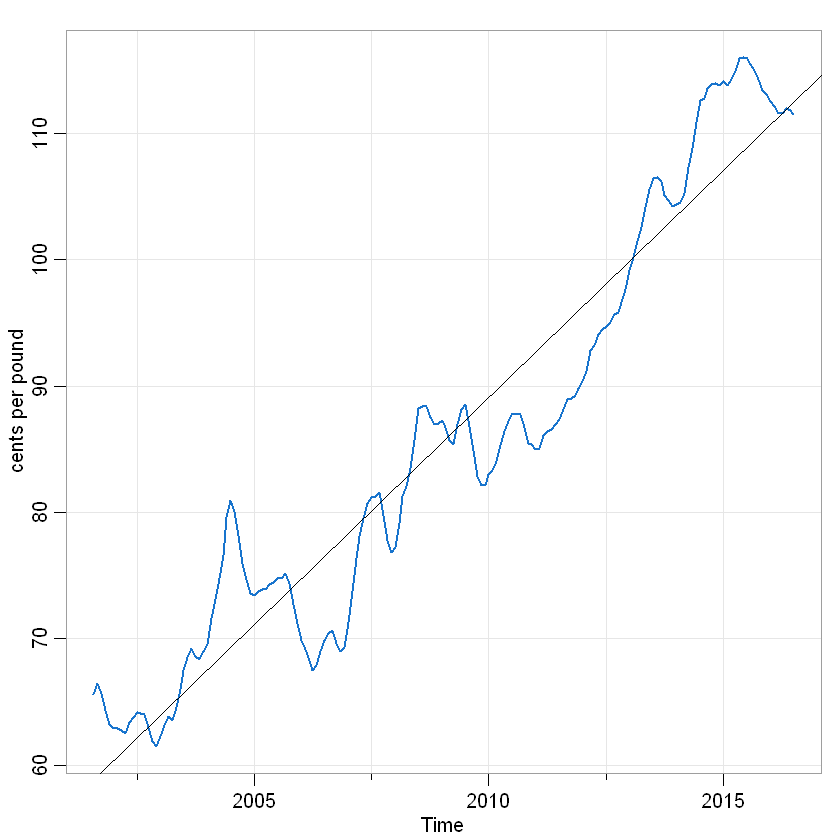

In [1]:
library(astsa)

####################
# Example 2.1 Linear trend
summary(fit <- lm(chicken~time(chicken))) # regress price on time
tsplot(chicken, ylab="cents per pound", col=4, lwd=2)
abline(fit)           # add the fitted regression line to the plot          

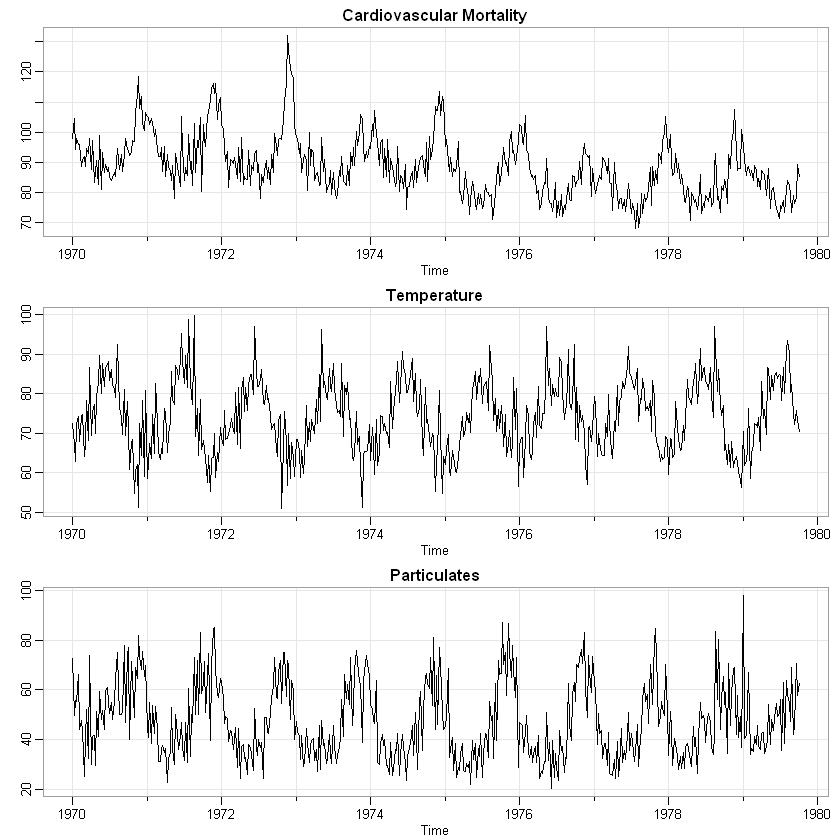

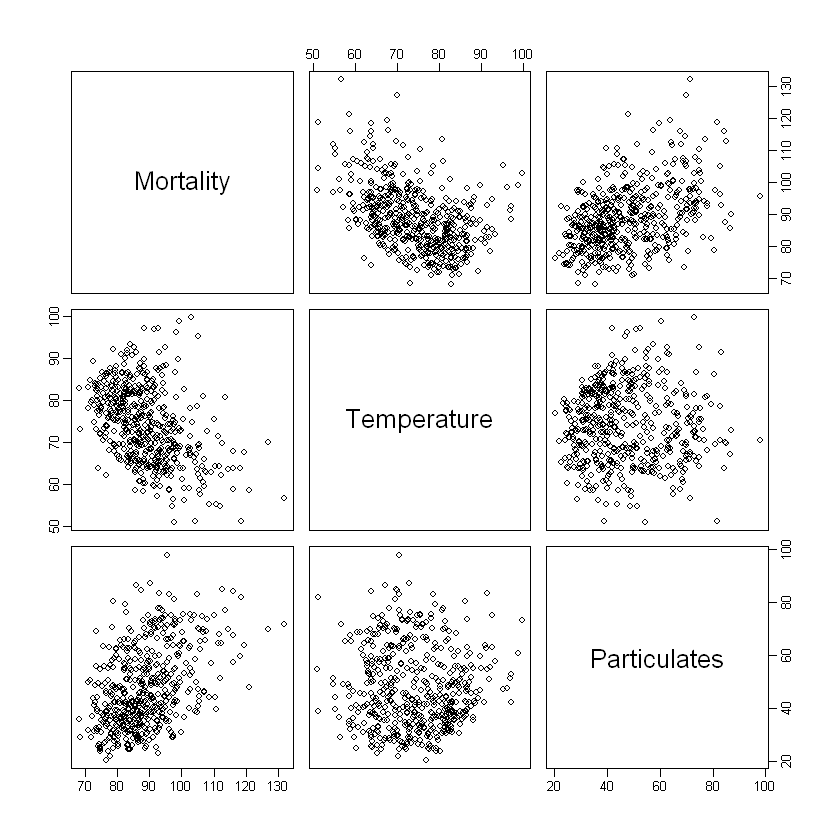

In [2]:
par(mfrow=c(3,1))
tsplot(cmort, main="Cardiovascular Mortality", ylab="")
tsplot(tempr, main="Temperature",  ylab="")
tsplot(part, main="Particulates", ylab="")

pairs(cbind(Mortality=cmort, Temperature=tempr, Particulates=part))

In [3]:
temp  = tempr-mean(tempr)  # center temperature    
temp2 = temp^2             # square it  
trend = time(cmort)        # time

fit = lm(cmort~ trend + temp + temp2 + part, na.action=NULL)

summary(fit)       # regression results
summary(aov(fit))  # ANOVA table   (compare to next line)
summary(aov(lm(cmort~cbind(trend, temp, temp2, part)))) # Table 2.1

num = length(cmort)                                     # sample size
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 
# AIC(fit, k=log(num))/num - log(2*pi)                  # BIC (alt method) 
# (AICc = log(sum(resid(fit)^2)/num) + (num+5)/(num-5-2)) # AICc
dev.off()


Call:
lm(formula = cmort ~ trend + temp + temp2 + part, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.0760  -4.2153  -0.4878   3.7435  29.2448 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.831e+03  1.996e+02   14.19  < 2e-16 ***
trend       -1.396e+00  1.010e-01  -13.82  < 2e-16 ***
temp        -4.725e-01  3.162e-02  -14.94  < 2e-16 ***
temp2        2.259e-02  2.827e-03    7.99 9.26e-15 ***
part         2.554e-01  1.886e-02   13.54  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.385 on 503 degrees of freedom
Multiple R-squared:  0.5954,	Adjusted R-squared:  0.5922 
F-statistic:   185 on 4 and 503 DF,  p-value: < 2.2e-16


             Df Sum Sq Mean Sq F value Pr(>F)    
trend         1  10667   10667  261.62 <2e-16 ***
temp          1   8607    8607  211.09 <2e-16 ***
temp2         1   3429    3429   84.09 <2e-16 ***
part          1   7476    7476  183.36 <2e-16 ***
Residuals   503  20508      41                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                                 Df Sum Sq Mean Sq F value Pr(>F)    
cbind(trend, temp, temp2, part)   4  30178    7545     185 <2e-16 ***
Residuals                       503  20508      41                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] 4.721732

[1] 4.771699

null device 
          1


Call:
lm(formula = rec ~ soiL6, data = fish, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.187 -18.234   0.354  16.580  55.790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   65.790      1.088   60.47   <2e-16 ***
soiL6        -44.283      2.781  -15.92   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.5 on 445 degrees of freedom
Multiple R-squared:  0.3629,	Adjusted R-squared:  0.3615 
F-statistic: 253.5 on 1 and 445 DF,  p-value: < 2.2e-16


null device 
          1

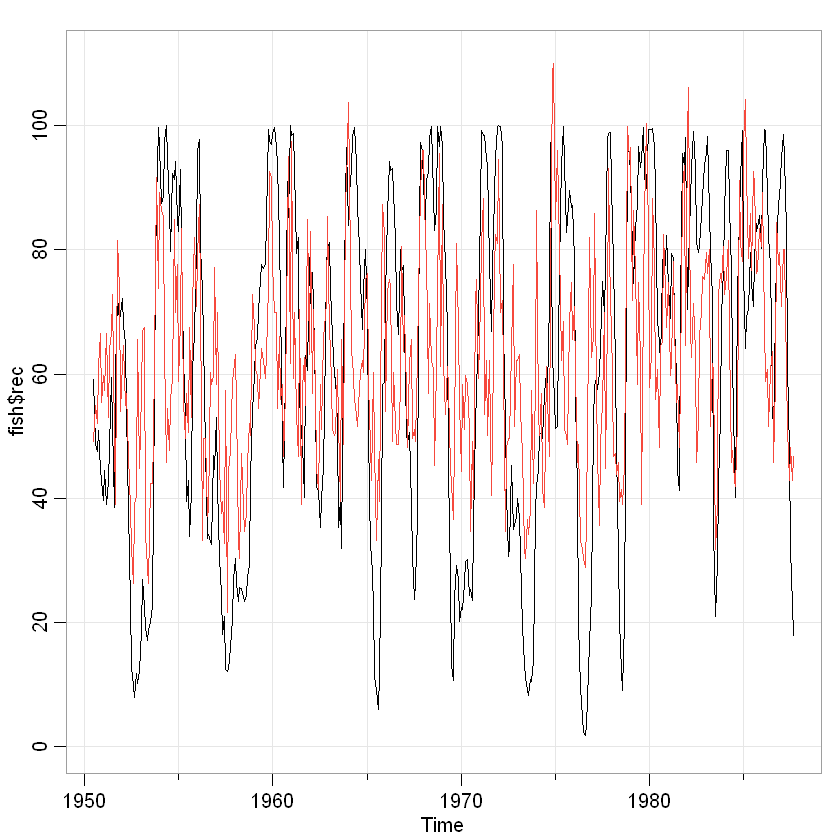

In [4]:
fish = ts.intersect(rec, soiL6=lag(soi,-6), dframe=TRUE)   
summary(fit <- lm(rec~soiL6, data=fish, na.action=NULL))
tsplot(fish$rec, ylim=c(0,111))  # plot the data and the fitted values (not shown in text) 
lines(fitted(fit), col=2)
dev.off()